# 2. Cantor Set & Devil's Staircase

**Goal:** Construct the classical Cantor set and the Cantor function (devil's staircase).

## Background

The **middle-thirds Cantor set** $C$ is constructed by iteratively removing the open middle third
of each remaining interval:

$$C_0 = [0,1], \quad C_1 = [0,\tfrac13] \cup [\tfrac23,1], \quad C_2 = [0,\tfrac19] \cup [\tfrac29,\tfrac13] \cup \cdots$$

$$C = \bigcap_{n=0}^{\infty} C_n$$

**Remarkable properties:**
- $C$ is **uncountable** (it's in bijection with $\{0,1\}^\mathbb{N}$ via ternary expansions)
- $C$ has **Lebesgue measure zero**: total length removed = $\sum_{n=0}^\infty 2^n \cdot 3^{-(n+1)} = 1$
- $C$ is **closed**, **perfect** (every point is a limit point), and **nowhere dense**

The **Cantor function** (devil's staircase) is the CDF of the uniform measure on $C$.
It is continuous, non-decreasing, maps $[0,1]$ onto $[0,1]$, yet has derivative $0$ a.e.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Constructing the Cantor Set

We represent each stage as a list of closed intervals and visualize the iterative removal.

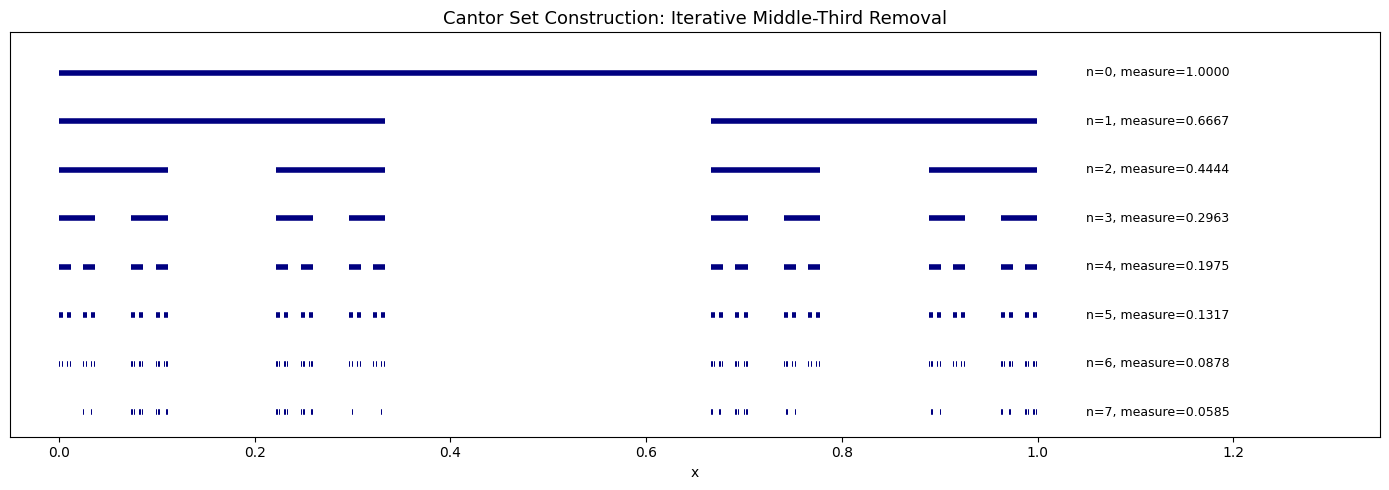

After 7 stages: 128 intervals, total measure = 0.058528
Limiting measure = 0 (since (2/3)^n → 0)


In [2]:
def cantor_intervals(n_stages):
    """Return the list of intervals at each stage of the Cantor set construction."""
    stages = [[(0.0, 1.0)]]
    for _ in range(n_stages):
        prev = stages[-1]
        new = []
        for a, b in prev:
            third = (b - a) / 3
            new.append((a, a + third))
            new.append((b - third, b))
        stages.append(new)
    return stages


n_stages = 7
stages = cantor_intervals(n_stages)

fig, ax = plt.subplots(figsize=(14, 5))
for i, intervals in enumerate(stages):
    y = -i * 0.6
    for a, b in intervals:
        ax.plot([a, b], [y, y], color='navy', linewidth=4, solid_capstyle='butt')
    # Measure of remaining set
    total_len = sum(b - a for a, b in intervals)
    ax.text(1.05, y, f'n={i}, measure={total_len:.4f}', va='center', fontsize=9)

ax.set_xlim(-0.05, 1.35)
ax.set_ylim(-(n_stages + 0.5) * 0.6, 0.5)
ax.set_yticks([])
ax.set_xlabel('x')
ax.set_title('Cantor Set Construction: Iterative Middle-Third Removal', fontsize=13)
plt.tight_layout()
plt.show()

print(f"After {n_stages} stages: {len(stages[-1])} intervals, "
      f"total measure = {sum(b-a for a,b in stages[-1]):.6f}")
print(f"Limiting measure = 0 (since (2/3)^n → 0)")

## Measure Removed at Each Stage

At stage $n$, we remove $2^n$ intervals each of length $3^{-(n+1)}$.
The total measure removed is:
$$\sum_{n=0}^{\infty} \frac{2^n}{3^{n+1}} = \frac{1}{3} \cdot \frac{1}{1 - 2/3} = 1$$

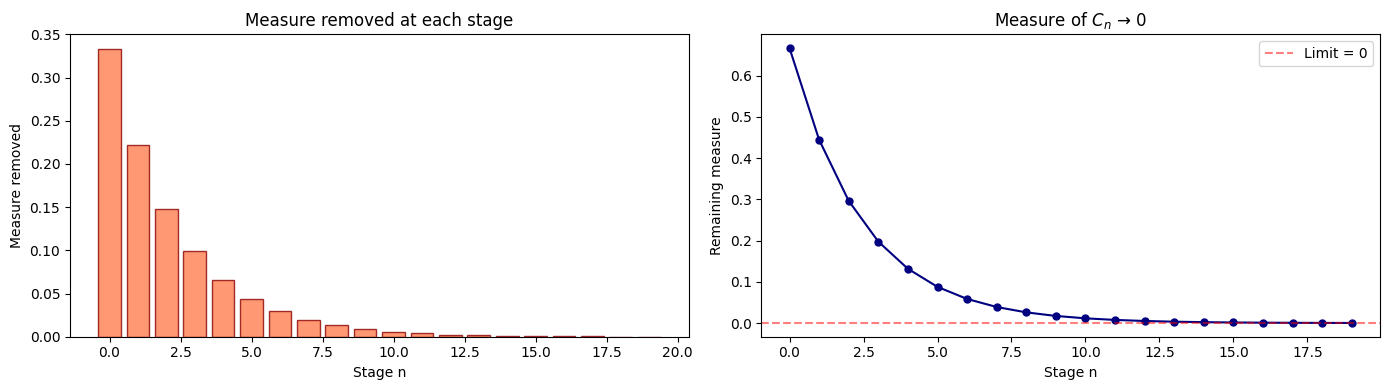

In [3]:
n_terms = 20
removed_per_stage = np.array([2**n / 3**(n+1) for n in range(n_terms)])
cumulative_removed = np.cumsum(removed_per_stage)
remaining = 1 - cumulative_removed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.bar(range(n_terms), removed_per_stage, color='coral', edgecolor='darkred', alpha=0.8)
ax1.set_xlabel('Stage n')
ax1.set_ylabel('Measure removed')
ax1.set_title('Measure removed at each stage')

ax2.plot(range(n_terms), remaining, 'o-', color='navy', markersize=5)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Limit = 0')
ax2.set_xlabel('Stage n')
ax2.set_ylabel('Remaining measure')
ax2.set_title('Measure of $C_n$ → 0')
ax2.legend()

plt.tight_layout()
plt.show()

## The Cantor Function (Devil's Staircase)

The Cantor function $f: [0,1] \to [0,1]$ can be defined using ternary expansions:

1. Write $x$ in base 3.
2. If $x$ contains a digit 1, replace everything after the first 1 with 0, and replace that 1 with 1.
3. Replace all 2s with 1s.
4. Read the result as a binary number.

Equivalently, on each removed middle-third interval, $f$ is constant at the appropriate dyadic rational.

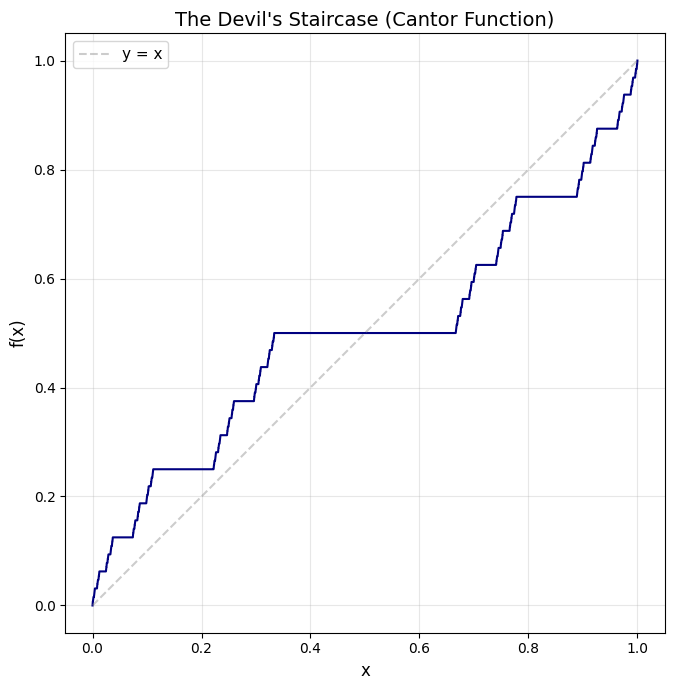

In [4]:
def cantor_function(x, n_digits=50):
    """Evaluate the Cantor function at x using ternary → binary conversion."""
    x = np.asarray(x, dtype=float)
    result = np.zeros_like(x)
    
    for i in range(len(x.flat)):
        val = x.flat[i]
        val = np.clip(val, 0.0, 1.0)
        binary_digits = []
        
        for _ in range(n_digits):
            val *= 3
            digit = int(val)
            if digit >= 3:
                digit = 2
            val -= digit
            
            if digit == 1:
                binary_digits.append(1)
                break  # Everything after is 0 in the binary expansion
            else:
                binary_digits.append(digit // 2)  # 0 → 0, 2 → 1
        
        # Convert binary digits to a number
        f_val = 0.0
        for k, d in enumerate(binary_digits):
            f_val += d * 2.0**(-(k + 1))
        result.flat[i] = f_val
    
    return result


x = np.linspace(0, 1, 5000)
y = cantor_function(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, color='navy', linewidth=1.5)
ax.plot([0, 1], [0, 1], '--', color='gray', alpha=0.4, label='y = x')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title("The Devil's Staircase (Cantor Function)", fontsize=14)
ax.set_aspect('equal')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Derivative is Zero Almost Everywhere

The Cantor function is constant on each removed interval (the complement of $C$),
which has measure 1. So $f'(x) = 0$ for a.e. $x$, yet $f$ increases from 0 to 1.

This shows that $f$ is **singular continuous** — it's continuous but all its "increase"
is concentrated on a set of measure zero.

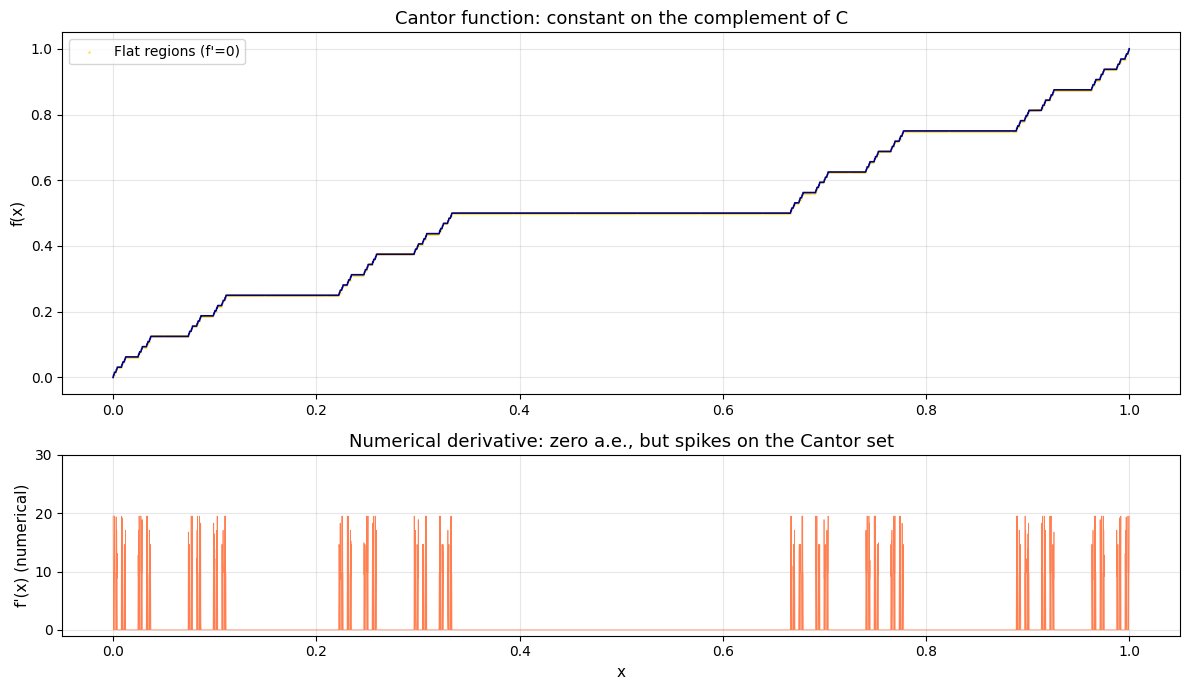

Fraction of grid points where f'(x) ≈ 0: 0.9160
(Should approach 1.0 as resolution increases)


In [5]:
# Numerical derivative
dx = x[1] - x[0]
dy = np.diff(y) / dx

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), gridspec_kw={'height_ratios': [2, 1]})

# Function
ax1.plot(x, y, color='navy', linewidth=1.2)
# Highlight flat regions (where derivative ≈ 0)
flat_mask = np.abs(dy) < 1e-6
flat_x = x[:-1][flat_mask]
flat_y = y[:-1][flat_mask]
ax1.scatter(flat_x[::5], flat_y[::5], c='gold', s=1, alpha=0.5, label='Flat regions (f\'=0)')
ax1.set_ylabel('f(x)', fontsize=11)
ax1.set_title('Cantor function: constant on the complement of C', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Derivative
ax2.plot(x[:-1], dy, color='coral', linewidth=0.5)
ax2.set_ylabel("f'(x) (numerical)", fontsize=11)
ax2.set_xlabel('x', fontsize=11)
ax2.set_title('Numerical derivative: zero a.e., but spikes on the Cantor set', fontsize=13)
ax2.set_ylim(-1, 30)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

frac_flat = np.sum(flat_mask) / len(flat_mask)
print(f"Fraction of grid points where f'(x) ≈ 0: {frac_flat:.4f}")
print(f"(Should approach 1.0 as resolution increases)")

## Ternary Expansion View

Every point in the Cantor set can be written in base 3 using only digits 0 and 2 (no 1s).
This gives the bijection with $\{0,2\}^\mathbb{N} \cong \{0,1\}^\mathbb{N}$, proving uncountability.

In [6]:
def is_in_cantor_set(x, n_digits=30):
    """Check if x is in the Cantor set by examining its ternary expansion."""
    val = x
    for _ in range(n_digits):
        val *= 3
        digit = int(val) % 3
        if digit == 1:
            return False
        val -= int(val)
    return True


# Sample random points and test membership
np.random.seed(42)
test_points = np.random.uniform(0, 1, 100000)
in_cantor = np.array([is_in_cantor_set(x) for x in test_points])

print(f"Out of {len(test_points)} random points in [0,1]:")
print(f"  {np.sum(in_cantor)} appear to be in the Cantor set")
print(f"  (Expected ≈ 0, since C has measure zero)")
print(f"\nYet the Cantor set is uncountable — it has the same cardinality as [0,1] itself!")

Out of 100000 random points in [0,1]:
  2 appear to be in the Cantor set
  (Expected ≈ 0, since C has measure zero)

Yet the Cantor set is uncountable — it has the same cardinality as [0,1] itself!


## Key Takeaways

1. **Measure zero ≠ small cardinality:** The Cantor set has measure 0 but is uncountable.
2. **Singular continuous measures exist:** The Cantor function defines a probability measure that is continuous but concentrated on a measure-zero set.
3. **Derivative zero a.e. doesn't mean constant:** The Cantor function increases from 0 to 1 while having $f'(x) = 0$ for almost every $x$.
4. The Cantor set is a key counterexample throughout measure theory, showing that intuitions from finite sets can fail badly.